# Mini projet

## Introduction
Sur la route, le souhait commun est d'effectuer son trajet le plus rapidement possible. La plupart du temps en respectant le code de la route et sans collisions. Pourtant, il n'est pas rare d'observer un phénomène d'embouteillage alors même qu'il semble n'y avoir aucun obstacle ou raison de ralentir. Cela va a l'encontre de ce souhait global de se déplacer rapidement. Pour comprendre l'émergence de ce phénomène, nous proposons de modéliser une portion de route du point de vue de chaque automobiliste.

Notre hypothèse initiale considère que ce phénomène suboptimal global provient d'une recherche d'optimisation individuelle. C'est un effet bien connu en théorie des jeux, et nous cherchons à savoir quels paramètres du comportement des usagers mènent à ce phénomène d'embouteillage. Une hypothèse annexe propose que pour un même comportement des usagers, les paramètres de circulation (comme la vitesse maximale et la densité) peuvent faire émerger ou non des embouteillages.

La circulation routière est un phénomène physique assez complet et déterministe étant donné l'input du conducteur. Notre modélisation est constituée de 2 parties :
- La modélisation de l'action du conducteur
- La modélisation de la cinématique de la voiture

La modélisation du conducteur se base sur l'environnement de la voiture. Le conducteur capte certaines informations et réagit en fonction. Soit par une accélération positive (accélérateur), soit par une accélération négative (frein), soit par une accélération nulle. Ces accélérations sont conditionnées par les capacités de la voiture et par la réaction minimum de l'automobiliste.

> **TODO : Rédiger une présentation des modélisations effectuées et des résultats obtenus**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conduite de projet
Ce projet est réalisé en binôme par Benjamin Seo et Thibaut Lavenant. Nos emplois du temps ne se recoupent malheureusement que très peu, Thibaut étant principalement disponible sur les heures de travail et Benjamin étant surtout disponible hors de ces heures. Pour nous permettre de collaborer sur ce projet nous utilisons l'outil en ligne Trello et une feuille de route partagée.

L'outil Trello nous permet de planifier et suivre l'avancement du projet. Les cartes sont placées dans les listes standard : A faire, En cours, Fait. Nous avons divisé la colonne "A faire" en 6 colonnes : une par semaine. S'y rajoute une colonne "Nice to Have" qui permet de lister les idées qui surviennent en cours de projet.

La répartition du projet selon les semaines s'est fait de la manière suivante :
- Semaine 1 : Choix du sujet et recherche documentaire
- Semaine 2 : Modélisation préalable et suite de la recherche documentaire
- Semaine 3 : Rédaction et présentation de la phase initiale
- Semaine 4 : Début de la seconde phase. Prise en compte des retours et planification des évolutions
- Semaine 5 : Mise ne place des évolutions
- Semaine 6 : Finalisation du rapport et préparation de la présentation orale

La procédure de mise en commun du travail est la suivante :
- Récupérer la dernière version de github (pull)
- Lire le changelog et les changements réalisés par notre binome
- Effectuer nos modifications
- Mettre à jour le changelog et rédiger un message de commit approprié
- Push des changements sur Github

En plus des points hebdomadaires avec Mr Lehoucq, nous faisons au moins un point téléphonique par semaine pour partager nos avancées et nos points de blocages. C'est aussi l'occasion de déplacer à la semaine suivante les taches qui n'ont pas été terminés la semaine. La gestion de ce projet s'apparente à une méthodologie agile avec des sprints d'une semaine. Le Trello a évolué au cours des semaines et en fonction des rétrospectives de sprint.

## Mise en place de l'espace de travail
La mise en place de l'espace de travail s'est faite la première semaine tel que prévu dans notre planing. Le choix des outils s'est fait selon les contraintes suivantes :
- Impossible de se retrouver physiquement. Donc besoin d'échanger le projet en ligne
- Périodes de travail qui ne se recouvrent pas. Donc besoin de disponibilité constante de l'espace de travail
- Benjamin ne possède pas d'environnement pour éxécuter du python sur son poste personnel

Pour exécuter la partie Python et le calepin jupyter nous utilisons la plateforme JupyterHub fournie par les enseignants. Celà réponds au besoin de disponibilité et retire le besoin d'installation d'un environnement local.

Pour colaborer, nous utilisons un dépot git hébergé sur github. De cette manière, les dernier changements sont toujours disponibles et nous garantissons de ne pas perdre les modifications l'un de l'autre. Nous nous sommes tous deux créé une clé RSA qui permet l'authentification auprès de Github et le pull-push depuis le terminal. Par la suite, nous avons créé un repository partagé et ajouté le calepin jupyter et la feuille de route au format txt.

Pour la gestion de projet nous utilisons Trello tel que décrit dans la gestion de projet. Celà répond au besoin de planification et de collaboration en décalé. Nous avons créé un nouvel espace de travail partagé et créé toutes les colonnes et cartes.

## Recherche documentaire

> **TODO : Rédiger mieux la partie recherche documentaire**

> **TODO : Ajouter des références dans le rapport pour chaque document mentionné**

- Modélisation stochastique macroscopique d'ordre supérieur du trafic sur les réseaux routiers : implications managériales.
Article intéressant et assez poussé. Il cite beaucoup de références et peut êre un point de départ pour trouver d'autres articles intéressants. Mais pas de représentation graphique
https://rfgi.fr/rfgi/article/view/1156

- Article de journal pour expliquer la formation des bouchons. Pas mal pour la partie vulgarisation
https://theconversation.com/comment-se-forment-les-embouteillages-163994

- Pareil, vulgarisation :
https://www.youtube.com/watch?v=wHz6S2dbYb4

- Un repo sympa a aller voir. Il utilise pygame pour la représentation
https://github.com/alokin-fr/road-traffic-simulation

- Un article chouette pour la modélisation et la représentation (le site est un peu chelou mais l'article vaut le coup)
https://ichi.pro/fr/simulation-du-flux-de-trafic-en-python-261815490433551

- https://www.youtube.com/watch?v=4DRGo3NUM_k

- https://www.youtube.com/watch?v=YbERBok9s0I et https://www.youtube.com/watch?v=tDMMyNQZuF8 : modèle type fluide

## Modélisation

### 1) Modèle d'accélération variable

### Présentation

On se propose d'étudier un premier modèle trivial pour commencer : on considère une route droite avec des voitures en file indienne, si la voiture de devant ralentit, les voitures de derrière vont aussi ralentir, cet effet peut se démultiplier. 

Le conducteur a essentiellement le contrôle sur son ralentissement/accélération (variables), celles-ci sont influencées par :

- La distance entre les deux voitures
- La vitesse relative 
- On peut penser à encore plus de variables : obstacles imminents, état émotionnel/physique du conducteur, présence de radars, état de la route etc.
    
*Le choix des variables est un reflet de la visée de notre modèle i.e. ce qu'on cherche à mettre en évidence*.
    
**Hypothèses faites :**

- Les voitures ont la même masse $m$ et longueur $L$
- Une seule voie (pas de doublement)
- La position des voitures est l'avant du véhicule, dénotée par $x_i(t)$
- A priori, on ne veut pas d'accident, donc on impose : 

$$ x_i(t)<x_{i-1}(t) + L$$

### Modèle et équations 

Avec nos deux variables, on peut supposer que plus la vitesse relative est grande, plus la force de freinage sera importante. De la même manière, plus la distance relative sera petite, plus la force de freinage sera importante. On peut donc supposer en premier lieu qu'on a la relation suivante : 

$$ m \cdot x''_{i}(t) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$

Comme l'humain ne réagit pas instantanément, on peut corriger la première approximation grossière en rajoutant un temps de réaction $\tau$ : 

$$ m \cdot x''_{i}(t+\tau) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$
    
On peut supposer que le temps de réaction $\tau$ est le même pour tous les conducteurs (nouvelle hypothèse). En intégrant une première fois : 

$$v_{i}(t+\tau) = C\ln(\left| x_{i}(t)-x_{i-1}(t)\right|)+D_i$$

Avec notre modèle, on cherche à optimiser le trafic, c'est-à-dire atteindre un équilibre, on pourrait le définir comme les conditions suivantes : 
- Les voitures ont la même vitesse $v$
- La distance entre les voitures est $d$
    
On peut alors parler de densité $\rho$ et on pourra étudier la vitesse des voitures en fonction de $\rho$ par exemple. Penchons-nous sur cela : déjà, la densité est donnée par $\rho = \frac{1}{L+d} = \frac{1}{\left | x_i(t)-x_{i-1}(t) \right |}$. La densité maximale est donnée lorsque $d=0$ i.e. $\rho_{max}=\frac{1}{L}$
    
Quelle pourrait être la relation $v(\rho)$ ?
    
Remarquons qu'à l'équilibre, on a :
    
$$\forall i, \ v(\rho)=C\ln\big(\frac{1}{\rho}\big)+D $$
    
Or, on a $v(\rho_{max})=0$, donc on obtient l'expression de $D=-C\ln\big(\frac{1}{\rho_{max}}\big)$ qu'on peut réintégrer dans l'expression au-dessus, $v=C\ln\big(\frac{\rho_{max}}{\rho}\big)$. On a également $v(\rho_{crit})=v_{max}$ (où $v(\rho_{crit})$ est par exemple la vitesse maximale due au code de la route ou aux habitudes de conduite, concrètement : $v$ est une constante égale à $v_{max}$ jusque $\rho_{crit}$ après quoi elle devient ensuite décroissante), d'où l'expression : 

$$v(\rho)=v_{max}\big[\ln(\frac{\rho_{max}}{\rho_{crit}})\big]^{-1}\cdot \ln(\frac{\rho_{max}}{\rho})$$
    
Remarquons de suite que le terme en tête est un paramètre exogène qu'on pourra fixer. 
Regardons maintenant l'expression du flux : 

$$\begin{array}{rcl}
j & = & \rho \cdot v(\rho) \\
& = & \rho\big(v_{max}\big[\ln(\frac{\rho_{max}}{\rho_{crit}})\big]^{-1}\cdot \ln(\frac{\rho_{max}}{\rho})\big)
\end{array}$$

Maximisons-le, en calculant $\frac{\mathrm{d}}{\mathrm{d}\rho}j(\rho)=0$, on obtient que le maximum est atteint en : 

$$\rho^{*}=\frac{\rho_{max}}{e} = \frac{1}{eL}$$
    
Enfin, on remarque qu'à l'équilibre, et, à la densité optimale de $\rho^{*} = \frac{1}{eL}$, on a :

$$v(\rho^{*})=v_{max}\big[\ln(\frac{\rho_{max}}{\rho_{crit}})\big]^{-1}$$

On remarque ici que la vitesse souhaitée en densité optimale est fonction de $\rho_{crit}$ qui est un facteur dépendant des habitudes de conduites (seuil de densité à partir duquel on ne peut plus rouler à la vitesse max). Il est bon de souligner que cette vitesse ne peut pas dépasser $v_{max}$. Cependant on peut calculer $\rho_{crit}$ tel que $v(\rho^{*}) = v_{max}$. On a alors $\rho_{crit} = \rho_{max}.e^{-1} = \rho^{*}$.

Le cas où $\rho_{crit} > \rho_{max}$ impliquerait que $v(\rho^{*}) > v_{max}$ ce qui n'est pas permis par les prémisses. On a donc $\rho_{crit} \leq \rho^{*}$

Également, en remplaçant $\rho^{*}$ dans la formule de la densité on obtient $d^{*} = L(e-1)$


**Propagation d'une perturbation :**

On étudie maintenant une suite de voitures se déplaçant à l'équilibre, puis leur comportement après perturbation. 
Déjà on remarque qu'à l'équilibre, avec nos hypothèses, si on prend deux voitures $x_1(t)$ et $x_2(t)$ telles que $x_2(t) \lt x_1(t)$, en fixant $x_1(0) = 0$, on aura à l'équilibre : $x_{1}^{*}(t) = vt$ et $x_{2}^{*}(t) = vt-(L+d)$. Et donc pour la voiture $i$, on aura : $x_{i}^{*}(t) = vt-(i-1)(d+L)$ 

On introduit une fonction utile qui donne la différence entre la position de la voiture après la perturbation et la position qu'elle aurait eu à l'équilibre :

$$\begin{array}{rcl}
\delta_{i}(t) & = & x_{i}(t) - x_{i}^{*}(t) \\
\delta_{i}(t) & = & x_{i}(t) - \big[vt- (i-1)(d+L)\big] 
\end{array}$$

La dérivée première donne : 

$$\delta'_{i}(t+\tau) = v_{i}(t+\tau)-v $$

Or : $$\begin{array}{rcl}
v_{i}(t+\tau) & = & v\ln(\left| x_{i}(t)-x_{i-1}(t)\right|)-v\ln\left | \frac{1}{\rho_{max}} \right | \\
& = & v\ln\left | \rho_{max}[x_{i}(t)-x_{i-1}(t)] \right |
\end{array}$$

On veut tout exprimer en termes de $\delta$, on remarque que : $x_i(t)-x_{i-1}(t) =  d+L + \delta_{i}(t)-\delta_{i-1}(t)$

D'où l'expression de $\delta'_{i}(t+\tau)$ :

$$\delta'_{i}(t+\tau) = v\ln\left | \rho_{max}[d+L + \delta_{i}(t)-\delta_{i-1}(t)] \right |-v$$

Il faut désormais modéliser la *première* voiture qui est à l'origine de la perturbation. Un modèle possible parmi tant d'autres serait : 
- La voiture commence avec la vitesse d'équilibre
- Elle freine légèrement entre $t=0$ et $t=t_{f}$
        
    ($t_{f}$ est donc le temps de freinage du conducteur)
- Elle revient à sa vitesse d'équilibre après
- Sa vitesse est donnée par 
    
$$
x'_{1}(t) = \left\{ \begin{array}{cl}
v &, & \ t \leq 0 \\
v(1-\varphi(t)) &, & \ t \gt 0
\end{array} \right.
$$

où :

$$
\varphi(t) = \left\{ \begin{array}{cl}
0 &, & \ t \le 0 \\
kte^{\frac{{\large t}_{f} \ - \ {\large t}}{{\large t}_{f}}} &, & \ t \gt 0 \ , \ k \ \text{constante} \gt 0 \ \text{liée à la force de freinage}
\end{array} \right.
$$

On cherche à avoir une vitesse strictement positive. De plus, pour simplifier la représentation, il est utile de définir une vitesse cible à la fin du freinage : $v_f$. On peut alors définir $k$ en fonction des paramètres : $k = \frac{1}{t_f}(1-\frac{v_f}{v})$

L'expression donnée $v(1-\varphi(t))$ pour $x'_{1}(t)$ est arbitraire, elle pourrait être tout autre. On cherchait simplement à avoir $\varphi(t)$ une fonction nulle pour $t \le 0$ et telle que $\lim_{t \to +\infty} \varphi(t) =0 $, continue et positive pour $t \ge 0, $ on a multiplié par $t$ pour avoir une vitesse continue dans le temps, et on a du $e^{-t}$ pour avoir un freinage qui impacte la vitesse que de très peu (quand t grand).

Pour obtenir l'expression de $x_1(t)$, on intègre simplement en utilsant le fait que $x_1(0)=0$ :

$$
x_{1}(t) = \left\{ \begin{array}{cl}
vt &, & \ t \leq 0 \\
v \big[t-\Phi(t)\big] &, & \ t \gt 0 \ : \ \text{où} \ \Phi(t) = \int_{0}^{t} \varphi(u)\mathrm{d}u
\end{array} \right.
$$

Pour notre première voiture, on a notre fonction $\delta_1(t)$ qui donne la différence entre les positions après perturbation $x_1(t)$ et à l'équilibre $x_{1}^{*}(t) = vt$, sera donnée par : 

$$
\delta_1(t) = \left\{ \begin{array}{cl}
0 &, & \ t \leq 0 \\
-v \Phi(t) &, & \ t \gt 0
\end{array} \right.
$$

**Perturbation pour les autres voitures :**

Pour les autres voitures, comme on a : 

$$
\forall \ i \in [\![2,N]\!] : \delta_{i}(t) = \left\{ \begin{array}{cl}
0 &, & \ t \leq 0 \\
x_{i}(t) - vt + (i-1)(d+L) &, & \ t \gt 0
\end{array} \right.
$$

En reprenant : $x_i(t)-x_{i-1}(t) =  d+L + \delta_{i}(t)-\delta_{i-1}(t)$ et $x_{i-1}(t)-x_{i}(t) \gt L$, on déduit : 
$$ \delta_{i-1}(t) + d \gt \delta_{i}(t)$$

On peut désormais étudier la dynamique complète de notre système : 

En effet, on a les conditions initiales, la perturbation première, et enfin le comportement des autres voitures dans le temps vu comme perturbation reliée au voisin :

$$ \forall \ i \in [\![2,N]\!], \ \delta'_{i}(t+\tau) = v\ln\big( \rho_{max}[d + L + \delta_{i-1}(t)-\delta_{i}(t)]\big) - v $$

*Résolution des EDO peuvent se faire par la méthode d'Euler (méthode des différences finies pour les dérivées)*

### Modélisation numérique

Illustrons la relation entre vitesse et densité, ainsi qu'entre flux et densité. On matérialise la définition de la vitesse d'équilibre et du flux en 2 fonctions :

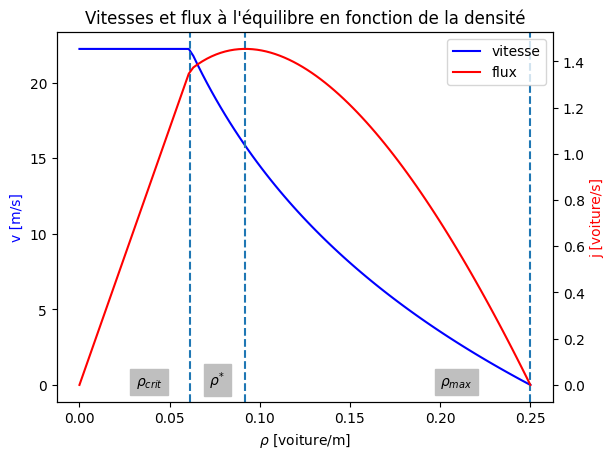

In [2]:
## ==== Constantes de modélisation ====
L = 4  #Longueur d'une voiture [m]
RHO_MAX = 1/L #Densité max [voiture/m]
V_MAX = 80/3.6 #Vitesse max [m/s]
RHO_STAR = 1/(L*np.exp(1)) #Densité optimale [voiture/m]
RHO_CRIT = RHO_STAR*2/3 #Densité critique [voiture/m]

## ==== Fonctions du modèle ====
def v(rho):
    '''Donne la vitesse d'équilibre pour une densité fixée [m/s]'''
    retVal = np.ones(len(rho)) * V_MAX
    retVal[rho > RHO_CRIT] = np.log(RHO_MAX/rho[rho > RHO_CRIT]) * V_MAX * 1/(np.log(RHO_MAX/RHO_CRIT))
    return retVal

def j(rho):
    '''Donne le flux à l'équilibre [voiture/s]'''
    return rho*v(rho)

## ==== Représentation graphique ====
x = np.linspace(0, RHO_MAX,100)

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$\rho$ [voiture/m]")
ax1.set_ylabel("v [m/s]", color = 'b')
ax1.plot(x,v(x), 'b-', label="vitesse")
ax1.axvline(x=RHO_CRIT,linestyle='--')
ax1.axvline(x=RHO_STAR,linestyle='--')
ax1.axvline(x=RHO_MAX,linestyle='--')

ax2 = ax1.twinx()
ax2.plot(x,j(x), color = 'r', label="flux")
ax2.set_ylabel("j [voiture/s]", color = 'r')

posTextY = 0
textFontSize = 10
plt.text(RHO_CRIT - 0.03, posTextY, r"$\rho_{crit}$", fontsize = textFontSize, backgroundcolor='0.75')
plt.text(RHO_STAR - 0.02, posTextY, r"$\rho^{*}$", fontsize = textFontSize, backgroundcolor='0.75')
plt.text(RHO_MAX - 0.05, posTextY, r"$\rho_{max}$", fontsize = textFontSize, backgroundcolor='0.75')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc=0)
plt.title("Vitesses et flux à l'équilibre en fonction de la densité")
plt.show()

On cherche maintenant à représenter graphiquement le profil de vitesse suite à un freinage de la première voiture. Je matérialise par une fonction le calcul de la position de la première voiture telle que décrite plus haut.

Pour la représentation graphique, j'utilise 2 vitesses arbitraires. La vitesse initiale est la vitesse maximale. La vitesse en fin de freinage est arbitrairement 70% de cette vitesse initiale. Le temps de freinage choisi est 2s.

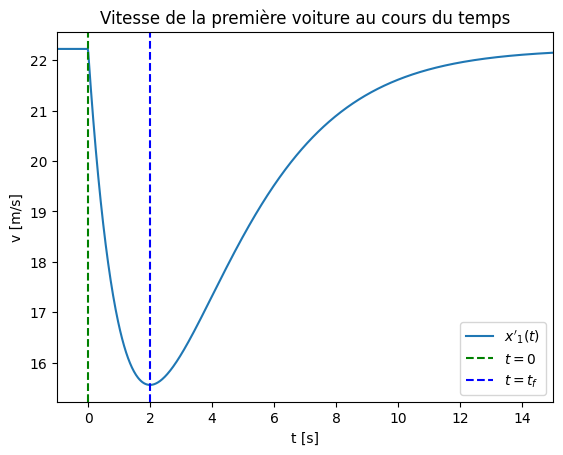

In [3]:
## ==== Variables de modélisation ====
# Vitesses initiale et de fin de freinage arbitraires
v_start = V_MAX # vitesse initiale [m/s]
v_end = v_start*0.7 # vitesse en fin de freinage [m/s]
t_f = 2 # temps de freinage [s]
k = 1/t_f * (1 - v_end/v_start) # Coefficient de freinage k [s^-1] 

## ==== Fonctions du modèle ====
def x_1_prime(t):
    '''Donne la vitesse de la voiture de tête pendant son freinage [m/s]'''
    retVal = np.ones(len(t)) * v_start
    retVal[t > 0] = v_start*(1 - k*t[t > 0]*np.exp((t_f-t[t > 0])/t_f))
    return retVal

## ==== Représentation graphique ====
t_l = np.linspace(-1,15,int(1e3))
y = x_1_prime(t_l)

plt.plot(t_l, y, label =r"$x'_{1}(t)$")
plt.axvline(x=0,color='green',linestyle='--', label = r"$t=0$")
plt.axvline(x=t_f,color='blue',linestyle='--', label = r"$t=t_f$")
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.xlim(t_l[0], t_l[-1])
plt.legend()
plt.title("Vitesse de la première voiture au cours du temps")
plt.show()

> La voiture se déplace à la vitesse d'équilibre $v$ jusque $t=0$, elle freine pendant $t=t_f$ et ensuite reprend sa vitesse initiale.

Une visualisation de la fonction $\delta_{1}(t)$ qui nous donne l'évolution temporelle de la distance entre la position réelle de la voiture 1 après perturbation et la position qu'elle aurait occupée sans perturbation *i.e.* à l'équilibre :

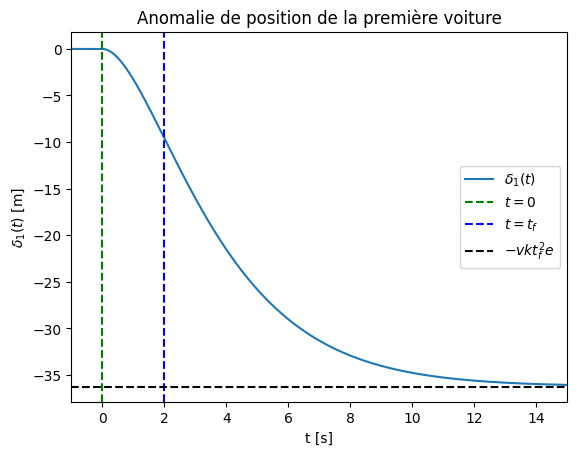

In [4]:
## ==== Fonctions du modèle ====
def delta_1(t): # On a calculé l'intégrale analytiquement (faisable)
    '''Renvoie l'anomalie de positionnement de la première voiture au cours du temps [m]'''
    retVal = np.zeros(len(t))
    retVal[t > 0] = -v_start*k*t_f*(t_f-(t[t > 0]+t_f)*np.exp(-t[t > 0]/t_f))*np.exp(1)
    return retVal

## ==== Représentation graphique ====
y = delta_1(t_l)
plt.plot(t_l, y, label =r"$\delta_{1}(t)$")
plt.axvline(x=0,color='green',linestyle='--', label = r"$t=0$")
plt.axvline(x=t_f,color='blue',linestyle='--', label = r"$t=t_f$")
plt.axhline(y=-v_start*k*t_f**2*np.exp(1),color='black',linestyle='--', label = r"$-vkt_{f}^{2}e$")
plt.xlabel("t [s]")
plt.ylabel(r"$\delta_{1}(t)$ [m]")
plt.xlim(t_l[0], t_l[-1])
plt.legend(loc = 'center right')
plt.title("Anomalie de position de la première voiture")
plt.show()

> La perturbation dans le temps concernant la première voiture quand elle a un profil de vitesse avec un freinage exponentiellement décroissant. On remarque qu'il y a un "gap" de distance de $vkt_{f}^{2}e$ entre la position de la voiture si elle n'avait pas freiné et sa position réelle.

Enfin, on cherche à représenter la propagation de la perturbation sur les voitures à l'arrière. On rappelle l'équation reliant l'anomalie de position aux paramètres du problème :

$$ \forall \ i \in [\![2,N]\!], \ \delta'_{i}(t+\tau) = v\ln\big( \rho_{max}[d + L + \delta_{i-1}(t)-\delta_{i}(t)]\big) - v $$

On souhaite utiliser une résolution numérique pour cette équation différentielle. On a comme condition initiales : $\delta'_{i}(t<0) = 0$ et $\delta_{i}(t<0) = 0$.

k = 1.0e-01s^-1
Tau = 0.6s
d = 6.9m
v = 15.8m/s


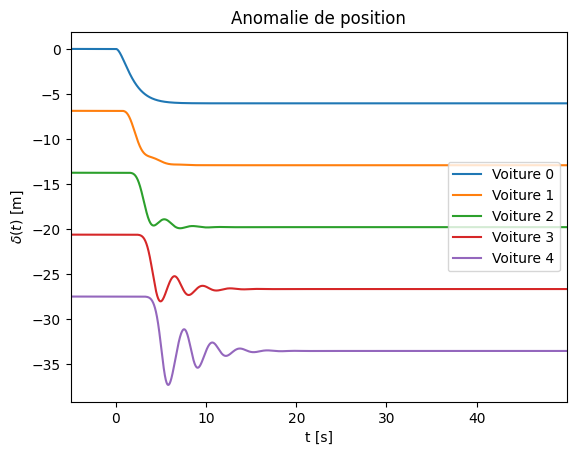

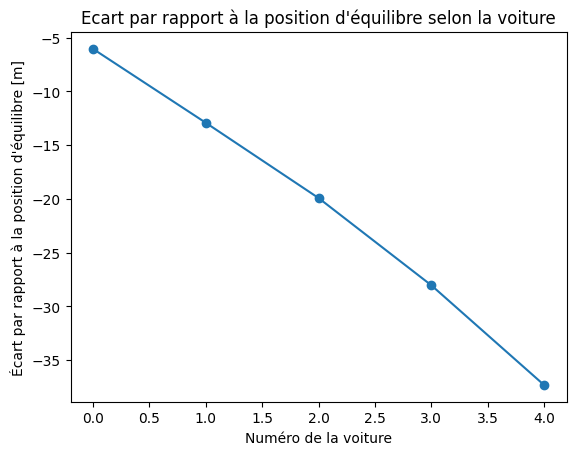

In [59]:
## ==== Constantes de simulation ====
DELTA_T = 0.001

## ==== Paramètres de simulation ====
tau_mult = 600
tau = tau_mult * DELTA_T
rho_exp = RHO_STAR
d = 1/rho_exp - L
v_eq = v(np.array([rho_exp]))[0]
v_end = v_eq*0.90 # vitesse en fin de freinage [m/s]
t_f = 1 # temps de freinage [s]
k = 1/t_f * (1-(v_end/v_eq)) # Coefficient de freinage k [s^-1] 
nb_car = 5
print(f"k = {k:.1e}s^-1")
print(f"Tau = {tau:.1f}s")
print(f"d = {d:.1f}m")
print(f"v = {v_eq:.1f}m/s")

## ==== Modélisation ====
t_start = -5
t_end = 50
t_l = np.arange(t_start,t_end,DELTA_T)
retVal = np.empty((nb_car, 2, len(t_l)))
retVal[:,:,t_l<=0] = 0 # Conditions initiales
i_start = 0
while t_l[i_start] < 0 :
    i_start = i_start + 1

# On calcule l'anomalie de position de la voiture 1
retVal[0,0,:] = delta_1(t_l)

# Pour chaque voiture
for car_num in range(1, nb_car):
    # Pour chaque instant
    for i in range(i_start, len(t_l)):
        # Calcul de la dérivée
        #print(f"I'm at {t_l[i]} and I look at {t_l[i-tau_mult]}")
        delta_im1_tmtau = retVal[car_num-1, 0, i-tau_mult]
        delta_i_tmtau = retVal[car_num, 0, i-tau_mult]
        retVal[car_num, 1, i] = v_eq*np.log(RHO_MAX * (d + L + delta_im1_tmtau - delta_i_tmtau)) - v_eq

        # Calcul de delta
        retVal[car_num, 0, i] = retVal[car_num, 0, i-1] + (retVal[car_num, 1, i] + retVal[car_num, 1, i-1])*DELTA_T/2

## ==== Représentation graphique ====
for i in range(nb_car):
    plt.plot(t_l, retVal[i,0,:] - i*d, label=f"Voiture {i}")
plt.xlabel("t [s]")
plt.ylabel(r"$\delta(t)$ [m]")
plt.xlim(t_l[0], t_l[-1])
plt.legend(loc = 'center right')
plt.title("Anomalie de position")
plt.show()

car = range(nb_car)
difference = [retVal[i,0,np.argmin(retVal[i,0,:])] - i*d for i in car]
plt.plot(car,difference, marker ='o')
plt.xlabel("Numéro de la voiture")
plt.ylabel("Écart par rapport à la position d'équilibre [m]")
plt.title("Ecart par rapport à la position d'équilibre selon la voiture")
plt.show()

> Notre modèle nous dit donc que la perturbation initiale (c'est-à-dire le freinage exponentiellement décroissant) de la voiture en tête de file se propage aux autres voitures derrière. Cette perturbation engendre bien le ralentissement attendu des conducteurs. 

> Deux phénomènes à remarquer : plus on considère une voiture loin derrière dans la file, plus la perturbation s'intensifie (de manière quadratique : **à check**), la voiture 0 ne s'écarte de sa position à l'équilibre que de 5 mètres alors que la voiture 4 s'en écarte de quasiment 10 mètres. 
Ensuite, plus le temps avance, plus le comportement des conducteurs devient contre-intuitif, ils avancent et reculent et ainsi de suite : c'est les oscillations des différentes courbes, et ce phénomène oscillatoire est encore plus marqué pour les voitures à l'arrière. 

### 2) Modèle macroscopique fluide

### Présentation


Il s'agit ici de voir un modèle macroscopique traitant du traffic comme de l'étude d'un fluide. Une observation liminaire consiste à dire que lorsqu'on regarde le traffic de très loin, le déplacement macroscopique des véhicules s'apparente à l'écoulement d'un fluide. On peut supposer que le mouvement macroscopique des véhicules ressemble à l'écoulement d'un fluide compressible à une dimension.
    
**Hypothèses faites :**
- Les conducteurs respectent les règles du code
- La longueur des voitures est la même
- Le flux du traffic est conservé (équation de continuité) : aucune voiture n'est créée de nulle part ni détruite.
- Il existe une relation bijective entre vitesse et densité, ainsi qu'entre flux et densité.
- On suppose que le nombre de voitures est assez grand pour que la densité moyenne et le flux moyen soient des fonctions de classe $\mathcal{C^1}$ d'espace et de temps.
    
**Définition des variables :**
- Densité : $\overrightarrow{\rho}(x,t)$ : nombre de voitures par unité de longueur à un instant $t$
- Densité de flux : $\overrightarrow{j}$ : nombre de voitures dépassant un point donné par unité de temps.
- Vitesse : $\overrightarrow{v}(x,t)$
- On a : $\overrightarrow{j} = \rho \cdot \overrightarrow{v}$

### Modèle et équations

On rappelle l'équation de continuité : $$\frac{\partial \rho}{\partial t} +\overrightarrow{\nabla}\cdot \overrightarrow{j}=0 \quad ,$$
avec $\overrightarrow{\nabla}\cdot$ l'opérateur divergence.
    
A une dimension, cela se ramène à : $$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

On a besoin d'une condition initiale : la densité initiale, à $t=0$, $$\rho(x,0)=\rho_0$$ 
    
Par ailleurs, cette EDP d'ordre 1 est résolvable, si $v = v(\rho)$, on aura alors deux équations exploitables.
    
On peut résoudre analytiquement (courbes caractéristiques) ou numériquement.
    
Examinons les propriétés que devrait satisfaire la relation vitesse et densité:
- $\frac{\mathrm{d}v}{\mathrm{d}\rho}<0$ : $v$ devrait être une fonction décroissante de la densité.
- $v=v_{max}$ lorsque $\rho =0$
- $v=0$ lorsque $\rho = \rho_{max}$
    
- **Modèle de Greenshield** : une première approche pourrait être de supposer qu'il existe une relation linéaire entre $v$ et $\rho$ telle que : 

$$v = v_{max}(1-\frac{\rho}{\rho_{max}})$$

On vérifie aisément que les trois conditions sur la relation entre vitesse et densité sont vérifiées.
On a par ailleurs : 
    
$$j = v_{max}(\rho - \frac{\rho^2}{\rho_{max}})$$

On pourra faire un graphique de $v$ en fonction de $\rho$,et également de $j$ en fonction de $\rho$.
On vérifie aisément que le maximum de $j$ est atteint en $\rho = \frac{\rho_{max}}{2}$ et vaut $j_{max} = \frac{v_{max}\rho_{max}}{4}$.

- **Modèle de Greenberg** : $$v = v_{max}\log(\frac{\rho_{max}}{\rho}) \quad ,$$ on a bien les trois conditions qui sont vérifiées.
On a par ailleurs : 

$$j = v_{max}\rho\log(\frac{\rho_{max}}{\rho}) $$

- **Modèle de Underwood** : $$v = v_{max}\exp(-\frac{\rho}{\rho_{max}})$$
On a : 

$$j = v_{max}\rho\exp(-\frac{\rho}{\rho_{max}}) $$

- **Modèle de Pipes et Munjal** : $$v = v_{max}\big(1-(\frac{\rho}{\rho_{max}})^n \big) \quad , \quad n \gt 1$$
On a : 

$$j = v_{max}\rho\big(1-(\frac{\rho}{\rho_{max}})^n \big)$$      

Concentrons-nous sur un modèle : celui de Lighthill, Whitham et Richards.

On part de l'équation de continuité avec les hypothèses qui vont bien : 

$$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

On a par ailleurs une relation : 

$$ v = v(\rho) $$

Des conditions initiales et aux limites :

$$\left\{ \begin{array}{cl}
\rho(x,0) & = \ \rho_0(x) \\
\rho(0,t) & = \ \alpha \\
\rho(L,t) & = \ \beta
\end{array} \right.$$

Commençons la résolution de notre problème : 

On cherche d'abord à discrétiser la route, *i.e.* notre abcisse $(Ox)$ donnée par l'intervalle $[0,l]$, où $l$ est la longueur de la route. 
On a donc : 

$$x(i+1) = x(i) + \mathrm{d}x \quad , \quad i \in [\![1,n-1]\!]$$

où : $\mathrm{d}x = \frac{l}{n-1}$

De la même manière : 

$$t(j+1) = t(j) + \mathrm{d}t $$

où $\mathrm{d}t = \frac{T}{m-1}$, avec $T$ : la durée considérée divisée en m-1 intervalles

De l'équation de continuité, on tire : 

$$\frac{\partial\rho}{\partial t} + \frac{\partial \rho}{\partial x} \cdot v + \frac{\partial v}{\partial x} \cdot \rho = 0$$

On utilise une méthode des différences finies, "forward in time, backward in space", par définition : 

$$ \frac{\partial \rho}{\partial t} = \lim_{\mathrm{d}t \to 0} \frac{\rho(x,t+\mathrm{d}t)-\rho(x,t)}{\mathrm{d}t} \simeq \frac{\rho(x,t+\mathrm{d}t)-\rho(x,t)}{\mathrm{d}t}$$

On choisit pour les deux autres termes :

$$ 
\left\{ \begin{array}{cl}
\frac{\partial \rho}{\partial x} & \simeq \ \frac{\rho(x,t)-\rho(x-\mathrm{d}x,t)}{\mathrm{d}x} \\
\frac{\partial v}{\partial x} & \simeq \ \frac{v(x,t)-v(x-\mathrm{d}x,t)}{\mathrm{d}x}
\end{array} \right.
$$

Ce qui donne pour notre modèle discret : 

$$ 
\left\{ \begin{array}{cl}
\frac{\partial \rho}{\partial t} & \simeq \ \frac{\rho(i,j+1)-\rho(i,j)}{\mathrm{d}t} \\
\frac{\partial \rho}{\partial x} & \simeq \ \frac{\rho(i,j)-\rho(i-1,j)}{\mathrm{d}x} \\
\frac{\partial v}{\partial x} & \simeq \ \frac{v(i,j)-v(i-1,j)}{\mathrm{d}x}
\end{array} \right.
$$

En réarrangant l'équation de continuité, on obtient l'évolution de la densité en $i$ au temps $j+1$ :

$$
\rho(i,j+1)= \rho(i,j) - \frac{\mathrm{d}t}{\mathrm{d}x}\big[v(i,j)\big(\rho(i,j)-\rho(i-1,j)\big) + \rho(i,j)\big(v(i,j)-v(i-1,j)\big)\big]
$$

### Modélisation numérique

## Modèle discret de la route

> **TODO : Séparer la présentation du modèle en Présentation, Equations, Modélisation numérique**

> **TODO Expliquer que ce modèle est un canevas pour faire jouer la simulation et voir comment évolue le système**

On s'intéresse à la modélisation d'une portion de route droite à une seule voie. On souhaite faire évoluer continuellement des voitures sur cette route.

Je représente chaque voiture de manière discrète par sa position, sa longueur et sa vitesse.

La modélisation repose fortement sur le comportement de l'automobiliste. L'automobiliste se comporte comme un automate déterministe qui connaît la distance avec une ou plusieurs voitures autor de lui et la vitesse relative. Cet automate interragit avec la voiture seulement en freinant ou en accélérant. On se donne un cadre de modélisation général qui prends en compte plusieurs critères du comportement d'un automobiliste :
- La vitesse de réaction qui se traduit par un délai entre l'évènement induisant une réaction et l'application de l'action par l'automobiliste
- L'accélération maximale / La force maximale de freinage
- La vitesse maximale
- Le temps minimal avec les voitures précédentes

Comme l'accélération maximale et la force maximale de freinage sont finies, la vitesse est une fonction continue.

On va chercher au préalable d'étudier l'impact des différents paramètres de modélisation sur le comportement de l'automobiliste.

Dans un premier temps je m'intéresse à la représentation possible d'une voiture sur une route circulaire. Je choisis une route circulaire de taille 1km, et une voiture se déplaçant à 30 km.h-1. La voiture tourne dans le sens direct et j'identifie sa position à l'instant t par la distance parcourue depuis le temps t=0.

On a donc $d = v * t$

Je crée une fonction qui permet d'obtenir la distance parcourue, la vitesse et l'accélération (tangentielle) de la voiture à des instants donnés.

In [6]:
import numpy as np

_maxSpeed = 30 / 3.6  # m.s-1
_trackLen = 1000    # m

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    # Position
    retVal[0, :] = np.mod(_maxSpeed * l_t, _trackLen)
    # Vitesse
    retVal[1, :] = np.ones(len(l_t)) * _maxSpeed
    # Accel
    retVal[2, :] = 0
    return retVal

A partir de ces donnés je peux tracer la position de la voiture en fonction du temps, sa vitesse et son accélération. Je vais avoir besoin de régulièrement afficher ces graphes alors je crée une fonction à cet effet.

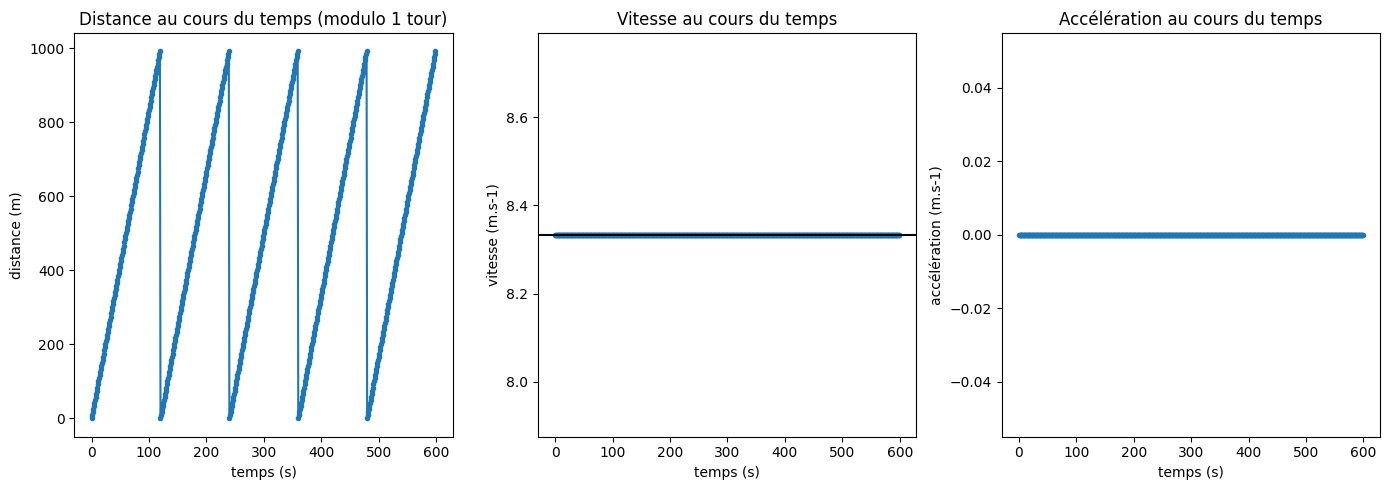

In [7]:
np_times = np.arange(0, 60*10, 1) # en secondes
np_carKinematics = getCarKinematics(np_times)

import matplotlib.pyplot as plt

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

showCarKinematics(np_carKinematics)

> **TODO : Faire une implémentation propre avec la méthode de récupération que l'on passe en paramètre**

## Modèle d'accélération constante

> **TODO Présenter le comportement comme une fonction piecewise**

> **TODO Expliquer les paramètres de simulation**

Je cherche maintenant à faire évoluer le comportement de la voiture. Je souhaite que la voiture accélère avec une accélération constante jusqu'à une vitesse maximale de 30 km.h-1 puis qu'elle stabilise sa vitesse.

A cet effet, nous allons faire une simulation instants par instants. A $t=0$ on a la voiture qui est immobile à la position 0. Ensuite, le conducteur va appliquer pendant un intervalle donné une accélération à la voiture. Accélération choisie en fonction de sa vitesse et de sa position actuelle. Cette accélération est limitée par les caractéristiques de la voiture à savoir :
- L'accélération maximale
- Le freinage maximal
- Le seuil d'accélération applicable par le conducteur
- La force de freinage minimale appliquée par le conducteur (en dessous de cette force, le conducteur laisse la voiture avancer)

Comme l'accélération est appliquée pour toute la durée de l'intervalle de temps, on trouve la vitesse en intégrant par la méthode des rectangles à droite. La distance est elle intégrée avec la méthode des trapèzes.

Pour cette modélisation préalable, on considère que le conducteur va accélérer au maximum des capacités de la voiture sans pour autant dépasser la vitesse limite. Il cherche alors à atteindre la vitesse max en un intervalle de temps. Ce qui équivaut à résoudre l'équation suivante :
$$
V_max = V + a\Delta t
$$
$$
\Leftrightarrow a = \frac{V_max - V}{\Delta t}
$$

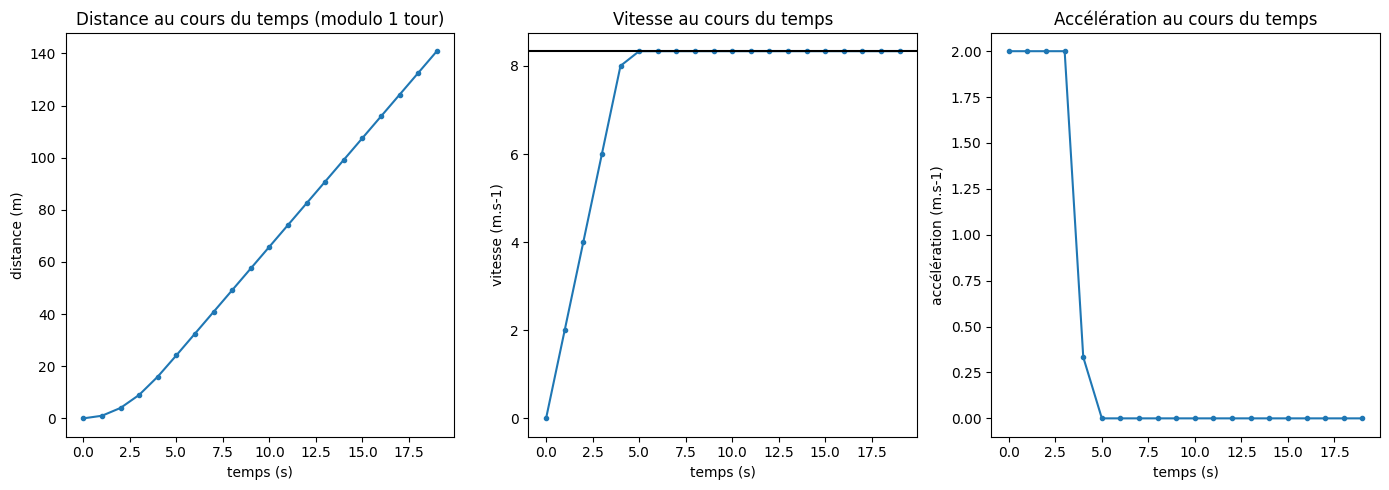

In [8]:
# Caractéristiques de la voiture
_accelMax = 2 #m.s-2
_accelMin = 0.2 #m.s-2
_breakMax = 10 #m.s-2
_breakMin = 1 #m.s-2

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        delta_t = l_t[1] - l_t[0]
        
        # On intègre par la méthodes des rectangles à droite et des trapèzes
        if (i > 0) :
            retVal[1, i] = retVal[1, i-1] + retVal[2, i-1] * delta_t
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
        
        # On calcule la réaction du conducteur à ces conditions
        if (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            desiredAccel = min((_maxSpeed - retVal[1, i]) / delta_t, _accelMax)
            if (desiredAccel < _accelMin):
                desiredAccel = 0
            retVal[2, i] = desiredAccel
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
    return retVal

# On affiche la nouvelle cinématique
np_times = np.arange(0, 20, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

On constate qu'avec cette approche on obtient un délai de réaction naturel qui corresponds à delta_t.

Je souhaite maintenant que la voiture ralentisse si un obstacle se présente, et s'arrête avant l'obstacle. Je place un obstacle fictif à la position 150 mètres. Je souhaite que la voiture commence à freiner à l'approche de cet obstacle et s'arrète juste avant. Il faut définir une distance à partir de laquelle commencer à freiner.

On cherche à trouver la force de freinage constante à appliquer pour arriver à une vitesse de 0 proche de l'obstacle. On pose les équations du mouvement uniformément accéléré :

$$
\left\{ \begin{array}{c}
v = v_0 + at \\
d = d_0 + v_0t + \frac{1}{2}at^2 \\
\end{array} \right.
$$

On souhaite une vitesse finale nulle à une distance qui corresponds à la distance avec l'obstacle. On peut donc définir $T$ comme le temps nécessaire à cette décélération. On obtient alors :

$$
\left\{ \begin{array}{c}
0 = v_0 + aT \\
d_{obstacle} = d_0 + v_0T + \frac{1}{2}aT^2 \\
\end{array} \right.
$$

$$
\Leftrightarrow \left\{ \begin{array}{cl}
T = -\frac{v_0}{a} \\
a = -1/2\frac{v_0^2}{d_{obstacle} - d_0} \\
\end{array} \right.
$$

> **TODO : Présenter le modèle d'accélération et de freinage en une fois**

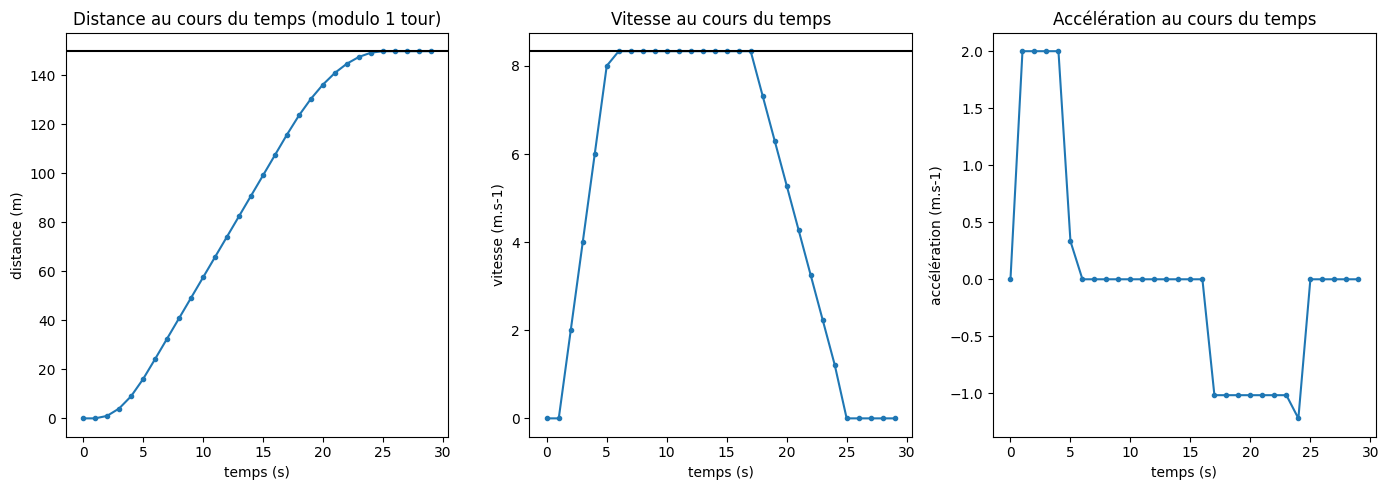

In [9]:
_obstaclePos = 150

def getBreakingForce(delta_t, relDis, speed) :
    '''Donne la force de freinage nécessaire en cas d'obstacle imminent'''
    if (speed * delta_t > relDis) :
        return speed / delta_t
    
    # On calcule le freinage voulu pour atteindre une vitesse de 0 à la distance d
    desiredBreaking = 1/2 * speed**2/relDis
    if (desiredBreaking < _breakMin):
        desiredBreaking = 0
    elif (desiredBreaking > _breakMax):
        desiredBreaking = _breakMax
    return desiredBreaking

def getAccelForce(delta_t, relDis, speed) :
    '''Donne l'accélération souhaitée pour atteindre la vitesse max'''
    if ((speed + _accelMin * delta_t) * delta_t > relDis) :
        return 0
    
    # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
    desiredAccel = min((_maxSpeed - speed) / delta_t, _accelMax)
    if (desiredAccel < _accelMin):
        desiredAccel = 0
    return desiredAccel

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        #print(f"t = {i}")
        delta_t = l_t[i] - l_t[i-1]
        
        if (i > 0) :
            retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0)
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
        
        # On récupère la force de freinage dues aux obstacles
        breakingForce = getBreakingForce(delta_t, _obstaclePos - retVal[0, i], retVal[1, i])
        if (breakingForce > 0) :
            # On freine à cause d'un obstacle
            retVal[2, i] = -breakingForce
        elif (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            retVal[2, i] = getAccelForce(delta_t, _obstaclePos - retVal[0, i], retVal[1, i])
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        #print(f"\tp = {retVal[0, i]:.2f} v = {retVal[1, i]:.2f} accel = {retVal[2, i]:.2f}")
    return retVal

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    axs[0].axhline(150, color='black')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

# On affiche la nouvelle cinématique
np_times = np.arange(0, 30, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

Observons maintenant le comportement de la voiture quand elle suit une autre voiture avec une vitesse inférieure à la vitesse maximale. Je modélise 2 voitures :
- Une voiture pilote avec une vitesse constante et qui pars de la position 50 mètres.
- Une voiture conduite par le conducteur simulé

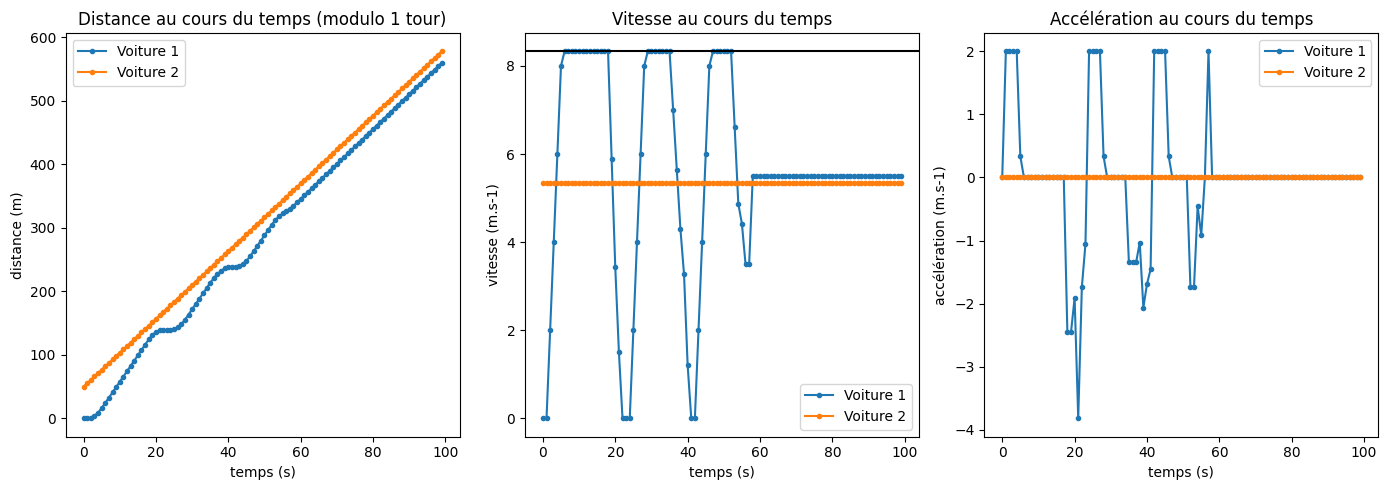

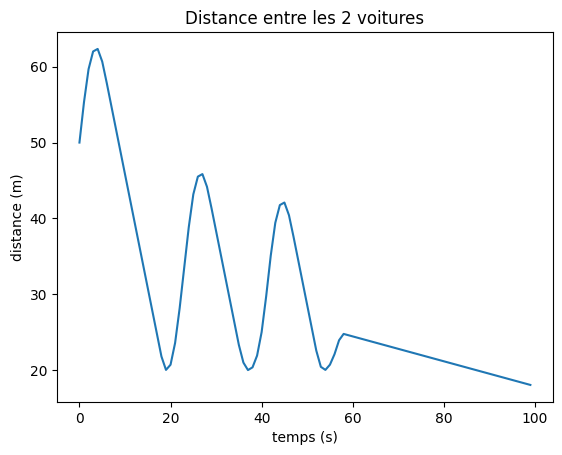

In [10]:
def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    pilotCar = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    pilotCar[0, 0] = 50
    pilotCar[1, :] = _maxSpeed - 3
    pilotCar[2, :] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        #print(f"t = {i}")
        delta_t = l_t[i] - l_t[i-1]
        
        if (i > 0) :
            retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0)
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
            pilotCar[1, i] = max(pilotCar[1, i-1] + pilotCar[2, i-1] * delta_t, 0)
            pilotCar[0, i] = pilotCar[0, i-1] + (pilotCar[1, i] + pilotCar[1, i-1]) * delta_t / 2
        
        # On récupère la force de freinage dues aux obstacles
        breakingForce = getBreakingForce(delta_t, pilotCar[0, i] - retVal[0, i] - 20, pilotCar[1, i] - retVal[1, i])
        if (breakingForce > 0) :
            # On freine à cause d'un obstacle
            retVal[2, i] = -breakingForce
        elif (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            retVal[2, i] = getAccelForce(delta_t, pilotCar[0, i] - retVal[0, i] - 20, retVal[1, i])
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        #print(f"\tp = {retVal[0, i]:.2f} v = {retVal[1, i]:.2f} accel = {retVal[2, i]:.2f}")
    return (retVal, pilotCar)

def showCarKinematics(np_carKinematics1, np_carKinematics2):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics1[0, :], '.-', label="Voiture 1")
    axs[0].plot(np_times, np_carKinematics2[0, :], '.-', label="Voiture 2")
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    axs[0].legend()
    
    axs[1].plot(np_times, np_carKinematics1[1, :], '.-', label="Voiture 1")
    axs[1].plot(np_times, np_carKinematics2[1, :], '.-', label="Voiture 2")
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    axs[1].legend()
    
    axs[2].plot(np_times, np_carKinematics1[2, :], '.-', label="Voiture 1")
    axs[2].plot(np_times, np_carKinematics2[2, :], '.-', label="Voiture 2")
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    axs[2].legend()
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

# On affiche la nouvelle cinématique
np_times = np.arange(0, 100, 1) # en secondes
(np_carKinematics1, np_carKinematics2) = getCarKinematics(np_times)
showCarKinematics(np_carKinematics1, np_carKinematics2)

# On affiche la distance séparant les 2 voitures
plt.plot(np_times, np_carKinematics2[0, :] - np_carKinematics1[0, :])
plt.title("Distance entre les 2 voitures")
plt.xlabel('temps (s)')
plt.ylabel('distance (m)')
plt.show()

On peut constater que la voiture arrive avec une vitesse trop grande par rapport à la voiture pilote et doit ralentir. Ces oscillations diminuent avant de se stabiliser.

## Comparaison des modèles

> **TODO : Déplacer l'implémentation de ce modèle dans sa partie**

Je cherche à utiliser la modélisation basée sur la formule suivante :
$$ 
x''_{i}(t+\tau) = \frac{c}{m}\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}
$$ 

On y rajoute un comportement pour l'accélération de cette manière :
$$
x''_{i}(t+\tau) = a_{max} * (1 - \frac{x'_{i}(t)^2}{v_{max}^2})
$$

On combine les 2 expressions avec un seuil sur la distance relative.

> **TODO : Intégrer le rapport de comparaison des modèles ici**

> **TODO : Intégrer l'extraction des paramètres comportementaux**

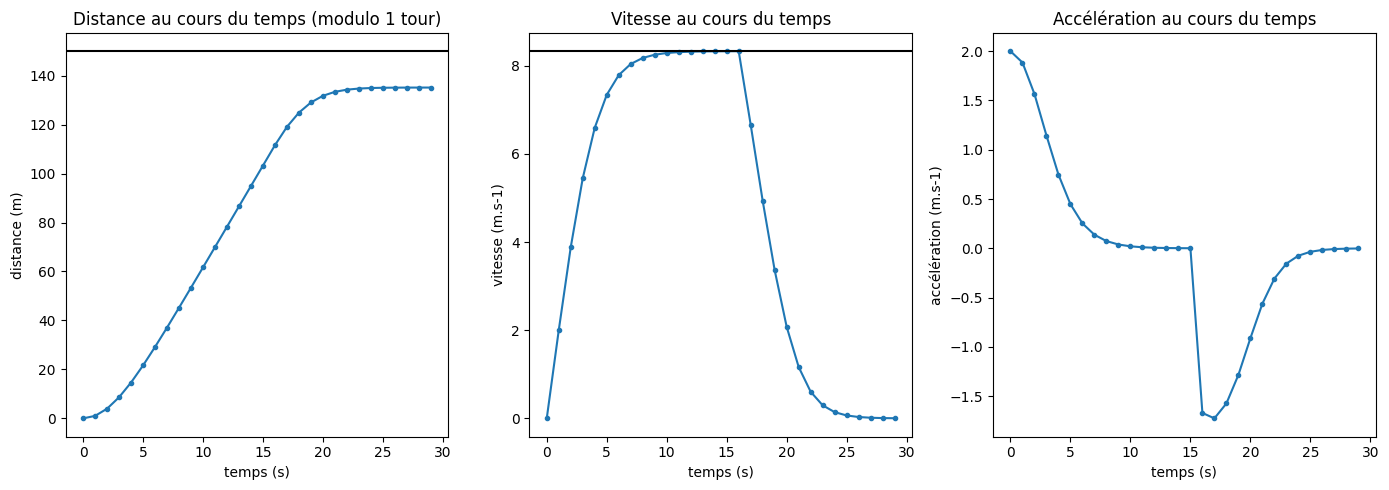

In [11]:
_obstaclePos = 150
C = 8
_limitBehav = 40 # m

def getCurrentAccel(relDis, relSpeed, speed) :
    accelPart = _accelMax * (1 - speed**2/_maxSpeed**2)
    breakPart = C * relSpeed / np.abs(relDis)
    behaviourFactor = np.tanh(relDis - _limitBehav)
    return 0.5*((1-behaviourFactor)*breakPart + (1+behaviourFactor)*accelPart)

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        #print(f"t = {i}")
        delta_t = l_t[i] - l_t[i-1]
        
        if (i > 0) :
            retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0)
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
        
        # On récupère la force de freinage dues aux obstacles
        retVal[2, i] = getCurrentAccel(150-retVal[0, i], -retVal[1, i], retVal[1, i])
        #print(f"\tp = {retVal[0, i]:.2f} v = {retVal[1, i]:.2f} accel = {retVal[2, i]:.2f}")
    return retVal

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    axs[0].axhline(150, color='black')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

# On affiche la nouvelle cinématique
np_times = np.arange(0, 30, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

## Etude d'émergence d'embouteillage

### Etude de l'impact des paramètres de la route

> **TODO : Faire rouler plusieurs voitures sur la même route et voir les conditions de stabilité en fonction du nombre de voitures et la vitesse max**

### Etude de l'impact des paramètres du comportement de l'automobiliste

> **TODO : Faire rouler plusieurs voitures sur la même route et voir les conditions de stabilité en fonction des params comportementaux**

## Conclusion